# Data Scientist Nanodegree

## Project Definition

### Project Overview
Dog breed identification is a difficult problem, and it would be even if we lived in an idealized world, in which every dog were a purebred.  Most current breeds have evolved significantly over time, and many are descended from types of dog that are no longer extant.  There are multiple registering organizations (AKC, KC (UK), EKC (Europe)), which have differing standards for each breed.

For this project, we'll be attempting to identify purebred dogs by sight alone.  This sidesteps most of the complexity of the underlying problem, but also throws out some valueable data.  There are additional facts that would help the classification, like height, weight and gender, that could also easily be incorporated into the computer model - if that data were available.  A human would certainly take these into account.

When an expert identifies a dog, typically this is done in person, and he has a number of qualitative and behavioral cues to work with.  If he was forced to work from a photograph alone, he would most likely make a number of errors.  (This is speculation, I was not able to find an example on this.)

In reality, most dogs are mixed breed anyway.  But people still like to categorize things.  For example, when someone is considering adopting a mixed breed dog, they usually they have a general archetype in mind.

The way this situation is handled in an animal shelter is to list a "dominant breed" and a "secondary breed".  Sometimes the dam and sire are known, often just the dam is known, and sometimes neither is known.  Then an overworked-but-underpaid veterinarian, staffer or volunteer, with wildly varying experience levels, will simply guess when filling out the paperwork.  A dog breed classifier that took a photo and additional data like height, weight and gender, and returned a dominant and secondary breed would be quite useful in industry.

Of course, the only way to know for sure is with a canine DNA test, which has its own collection of pitfalls - and is entirely beyond the scope of this project.

The data supplied for this project is a large collection of labelled photographs.    

### Problem Statement
The objective of this project is to develop a network that, given a photo of a dog, will identify its breed.  If instead it is given the photo of a human, it will identify the subject as human and give the dog breed that the subject most resembles.

There are no constraints placed on the input photos, but it does make a number of assumptions:
- The scene should be well lit.
- The camera should be level to the horizon, and pitched level or slightly downward.
- The photo should contain exactly one subject.
- The subject should be large, centered in the frame and unobscured - as in a portrait photo.
- The photo shows the subject in profile, half-profile or from the front.
- If the subject is a dog:
  - The dog should be upright and preferably in a still pose.  (e.g. standing)
  - The dog should be a purebred.
  - Ideally, the photo would show the whole dog.  (This is not a requirement, but it ought to be...)
- If the subject is human:
  - The entire face should be visible, but only the face is necessary.
  - The face should be upright.
  
The strategy for solving the problem is to first develop a classifier that identifies the subject as a dog, a human, or neither.  Then, a classifier is applied to identify purebred dog subjects using a CNN.

Practice is ahead of theory in deep learning, so coming up with an effective network for predicting dog breeds is ultimately trial-and-error.  This prepared notebook guides the search by introducing different networks and techniques as it progresses, which is a great help.  (Thanks Udacity!)  During training, the efficacy of a given network is measured by dividing the data into training, validation, and test sets, and getting an accuracy score on the test set.

When completed, the classifier should be able to predict a dog breed with a "reasonable" degree of accuracy.  The data set has 133 (!) breeds.  Only a subject matter expert would know all of the breeds, let alone correctly identify them.  It's hard to know in advance what degree of of accuracy can be expected, but even a dog expert will be less than 100% accurate when working from photos alone.

In the case where the subject is human, the "predicted dog breed" is just for fun, so that output is not measured.

### Metrics
The main metric of interested is the prediction accuracy, expressed as a percentage.

During training, loss is used, although it's a little too abstract for human consumption.  The number of epochs and the training time per epoch are also output, which are quite important when running the notebook.  All of these metrics are of little interest to the end user, who just wants to see the results.

Another metric of concern is the amount of data that is moved around in each epoch.  Even though the notebook runs without error on my local PC, in practice it's too slow to be usable.  This is of little interest to the end user, but computational expense places limits on what can be done.

---
### Note:

To maintain the flow of the document, the Analysis follows Step 0.

Methodology and Results are interspersed throughout the notebook body.

The Conclusion is partly in Step 7, and follows at the end.

## Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 


This notebook walks you through one of the most popular Udacity projects across machine learning and artificial intellegence nanodegree programs.  The goal is to classify images of dogs according to their breed.  

If you are looking for a more guided capstone project related to deep learning and convolutional neural networks, this might be just it.  Notice that even if you follow the notebook to creating your classifier, you must still create a blog post or deploy an application to fulfill the requirements of the capstone project.

Also notice, you may be able to use only parts of this notebook (for example certain coding portions or the data) without completing all parts and still meet all requirements of the capstone project.

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this IPython notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Write your Algorithm
* [Step 7](#step7): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

### Import Dog Dataset

In the code cell below, we import a dataset of dog images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `dog_names` - list of string-valued dog breed names for translating labels

In [3]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import re

# define function to load train, test, and validation datasets
def format_breed(path):
    matches = re.match( r'.*\.(.*)/', path, re.M|re.I)
    breed = matches.group(1)
    return breed

def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('../../../data/dog_images/train')
valid_files, valid_targets = load_dataset('../../../data/dog_images/valid')
test_files, test_targets = load_dataset('../../../data/dog_images/test')

# load list of dog names
dog_names = [format_breed(item) for item in sorted(glob("../../../data/dog_images/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

Using TensorFlow backend.


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


### Import Human Dataset

In the code cell below, we import a dataset of human images, where the file paths are stored in the numpy array `human_files`.

In [4]:
import random
random.seed(8675309)

# load filenames in shuffled human dataset
human_files = np.array(glob("../../../data/lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


---
## Analysis

### Data Exploration
Machine Learning is a part of Data Science, but it's kind of off in its own corner.  None of the usual data science metrics (like variance or F1 score) apply to this problem.

The supplied data is a set of image files, grouped into folders by breed.  The folder name corresponds to the breed name, so we are able to extract the breed from the file path; the path contains the label.

All of the training data is assumed to be accurate and correctly categorized.  I actually did download the images and spot checked them.  To the extent that I'm a "dog expert", it all looks good to me!

__However,__ many of the training images contain multiple subjects and/or people.  In the Problem Statement I listed a number of assumptions for the input data.  Most of these rules are broken in the train, validate and test sets.  If a network can perform resonably well on this input, it should perform even better if the input is restricted to follow those rules.

Among the image files, there is no manifest of other document providing additional data about the dogs.

### Data Visualization


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df_targets = pd.DataFrame(data=train_targets, columns=dog_names)
df_count = df_targets.sum(axis=0).sort_values(ascending=False).to_frame(name='Count')

df_count.iloc[-1].Count, df_count.iloc[0].Count

(26.0, 77.0)

The number of photos per breed ranges from 26 to 77.  This variance does not seem to correspond to anything, such as popularity.  It's probably more a function of what was conveniently available when the data was collected.

This is not very much training data.  The subjects will be male and female (some breeds are dimorphic), with different coat colors and thicknesses, docked and undocked tails (some breeds), cropped and uncropped ears (some breeds), etc.  Even with a very 'smart' network, there is simply not enough training data to train the network _well_.

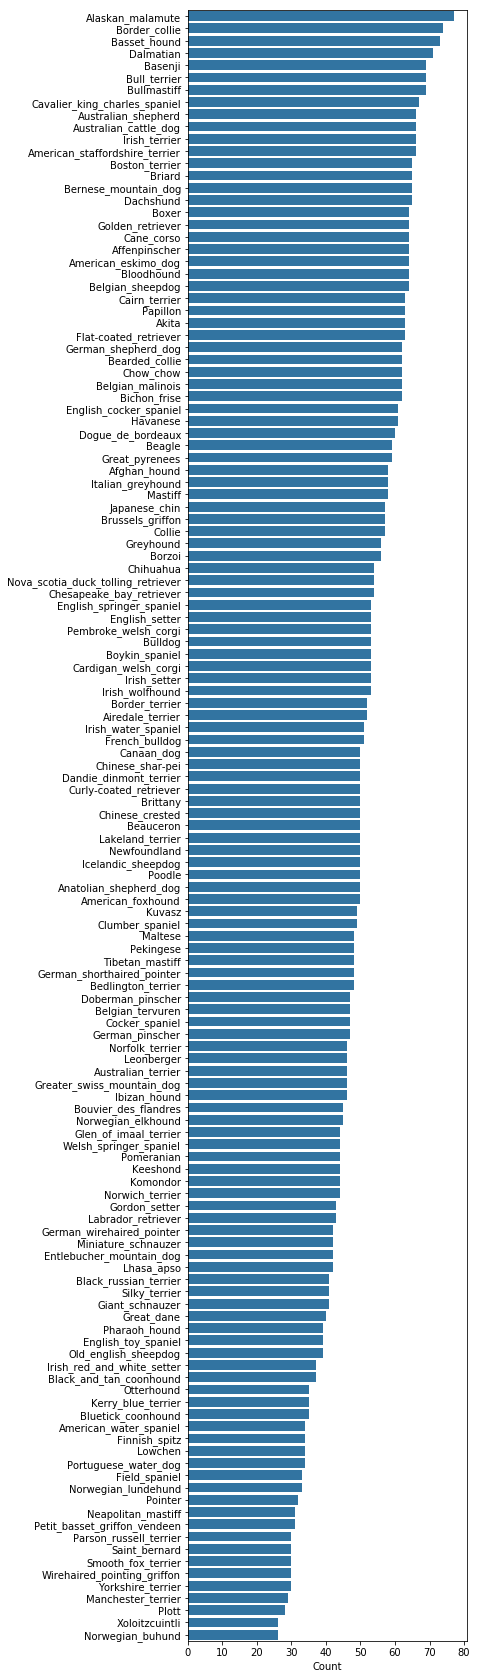

In [6]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(5,30))
sb.barplot(x='Count', y=df_count.index, data=df_count, color=base_color);

The human faces also do not strictly follow the simplifying assumptions in the Problem Statement.  Many of them have other people in the frame.  But the overall data quality is higher than the dog training images.  Most of the subjects are public figures and the images look as though they were cropped from newspaper photos.  This may have something to do with copyright or privacy laws.

The human face data set is large.  Again, it's probably skewed toward individuals whose image is easy to procure, rather than a representative sample of humanity.

It's not really worth exploring the facial data in great detail.  We're trying to build a dog breed classifier!

---
<a id='step1'></a>
## Step 1: Detect Humans

We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.

In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


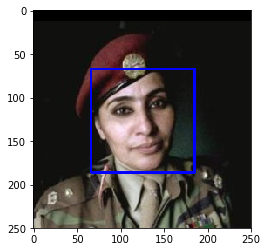

In [5]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [6]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ <span style="color:slategray">below</span>

In [7]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.

human_count = sum([1 if face_detector(file) else 0 for file in human_files_short])
human_percent = 100 * human_count / len(human_files_short)
print("{:10.0f}% of the first 100 images in human_files_short have a detected human face".format(human_percent))

human_count = sum([1 if face_detector(file) else 0 for file in dog_files_short])
human_percent = 100 * human_count / len(dog_files_short)
print("{:10.0f}% of the first 100 images in dog_files_short have a detected human face".format(human_percent))

       100% of the first 100 images in human_files_short have a detected human face
        11% of the first 100 images in dog_files_short have a detected human face


__Question 2:__ This algorithmic choice necessitates that we communicate to the user that we accept human images only when they provide a clear view of a face (otherwise, we risk having unneccessarily frustrated users!). In your opinion, is this a reasonable expectation to pose on the user? If not, can you think of a way to detect humans in images that does not necessitate an image with a clearly presented face?

__Answer:__
<span style="color:slategray">This seems like a reasonable expectation.  Predicting a dog breed from a photo of a human is something we'd do for fun.  If some users object, they don't have to use the program.  You can't please all of the people all the time.</span>

<span style="color:slategray">In applications such as analyzing surveillance video, it might be hard to detect human faces at a distance or in bad lighting or weather.  Full body detection can also be used to detect humans.</span>

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on each of the datasets.

In [8]:
## (Optional) TODO: Report the performance of another  
## face detection algorithm on the LFW dataset
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a pre-trained [ResNet-50](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006) model to detect dogs in images.  Our first line of code downloads the ResNet-50 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Given an image, this pre-trained ResNet-50 model returns a prediction (derived from the available categories in ImageNet) for the object that is contained in the image.

In [9]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [10]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

### Making Predictions with ResNet-50

Getting the 4D tensor ready for ResNet-50, and for any other pre-trained model in Keras, requires some additional processing.  First, the RGB image is converted to BGR by reordering the channels.  All pre-trained models have the additional normalization step that the mean pixel (expressed in RGB as $[103.939, 116.779, 123.68]$ and calculated from all pixels in all images in ImageNet) must be subtracted from every pixel in each image.  This is implemented in the imported function `preprocess_input`.  If you're curious, you can check the code for `preprocess_input` [here](https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py).

Now that we have a way to format our image for supplying to ResNet-50, we are now ready to use the model to extract the predictions.  This is accomplished with the `predict` method, which returns an array whose $i$-th entry is the model's predicted probability that the image belongs to the $i$-th ImageNet category.  This is implemented in the `ResNet50_predict_labels` function below.

By taking the argmax of the predicted probability vector, we obtain an integer corresponding to the model's predicted object class, which we can identify with an object category through the use of this [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). 

In [11]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

### Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained ResNet-50 model, we need only check if the `ResNet50_predict_labels` function above returns a value between 151 and 268 (inclusive).

We use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [12]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 3:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ <span style="color:slategray">below</span>

In [13]:
dog_count = sum([1 if dog_detector(img) else 0 for img in human_files_short])
dog_percent = 100 * dog_count / len(human_files_short)
print("{:10.0f}% of the images in human_files_short have a detected dog".format(dog_percent))

dog_count = sum([1 if dog_detector(img) else 0 for img in dog_files_short])
dog_percent = 100 * dog_count / len(dog_files_short)
print("{:10.0f}% of the images in dog_files_short have a detected dog".format(dog_percent))

         0% of the images in human_files_short have a detected dog
       100% of the images in dog_files_short have a detected dog


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 1%.  In Step 5 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

Be careful with adding too many trainable layers!  More parameters means longer training, which means you are more likely to need a GPU to accelerate the training process.  Thankfully, Keras provides a handy estimate of the time that each epoch is likely to take; you can extrapolate this estimate to figure out how long it will take for your algorithm to train. 

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have great difficulty in distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun! 

### Pre-process the Data

We rescale the images by dividing every pixel in every image by 255.

In [14]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 836/836 [00:08<00:00, 101.22it/s]


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        model.summary()

We have imported some Python modules to get you started, but feel free to import as many modules as you need.  If you end up getting stuck, here's a hint that specifies a model that trains relatively fast on CPU and attains >1% test accuracy in 5 epochs:

![Sample CNN](images/sample_cnn.png)
           
__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  If you chose to use the hinted architecture above, describe why you think that CNN architecture should work well for the image classification task.

__Answer:__ <div style="color:slategray">Note:  The network is trained twice - once with the data provided, and once with augmented data.
    

This network was initially built using ideas the sample above and [the CIFAR-10 example on the Keras site](https://keras.io/examples/cifar10_cnn/) as models, didn't train much, and got a very low score.  I added some layers and made them wider to give it a little more "grey matter" to work with.

The next problem I encountered is the enlarged network wouldn't train at all.  So I added some dropout between the layers.  After considerable tweaking, I got it to train on the plain data set, and then trained it with augmented data.  Each time I run the notebook, the scores vary a bit, but the network trained with augmented data consistently scores higher.</div>

In [1]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(filters=8, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.15))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.35))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(133, activation='softmax'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 8)       104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 8)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 16)      528       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 32)        2080      
__________

### Compile the Model

In [16]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [17]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 20

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 21s 3ms/step - loss: 4.8870 - acc: 0.0075 - val_loss: 4.8776 - val_acc: 0.0108
Epoch 2/20
6680/6680 [==============================] - 20s 3ms/step - loss: 4.8742 - acc: 0.0096 - val_loss: 4.8724 - val_acc: 0.0108
Epoch 3/20
6680/6680 [==============================] - 20s 3ms/step - loss: 4.8586 - acc: 0.0123 - val_loss: 4.8707 - val_acc: 0.0120
Epoch 4/20
6680/6680 [==============================] - 20s 3ms/step - loss: 4.8430 - acc: 0.0132 - val_loss: 4.8721 - val_acc: 0.0084
Epoch 5/20
6680/6680 [==============================] - 20s 3ms/step - loss: 4.8261 - acc: 0.0153 - val_loss: 4.8487 - val_acc: 0.0108
Epoch 6/20
6680/6680 [==============================] - 20s 3ms/step - loss: 4.8170 - acc: 0.0166 - val_loss: 4.8396 - val_acc: 0.0144
Epoch 7/20
6680/6680 [==============================] - 20s 3ms/step - loss: 4.7737 - acc: 0.0163 - val_loss: 4.8816 - val_acc: 0.0096
Epoch 8/

### Load the Model with the Best Validation Loss

In [18]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [19]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 3.8278%


### <span style="color:slategray">Now testing the same model with augmented data</span>

In [22]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(train_tensors)

In [23]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 20
batch_size = 16

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch_augmented.hdf5', 
                               verbose=1, save_best_only=True)

model.fit_generator(
    datagen.flow(train_tensors, train_targets, batch_size=batch_size),
    steps_per_epoch=len(train_tensors) / batch_size, 
    validation_data=datagen.flow(valid_tensors, valid_targets, batch_size=batch_size),
    #validation_data=(valid_tensors, valid_targets),
    validation_steps=len(valid_tensors) / batch_size,
    epochs=epochs,
    callbacks=[checkpointer],
    verbose=1)

Epoch 1/20
418/417 [==============================] - 96s 229ms/step - loss: 4.4828 - acc: 0.0377 - val_loss: 4.5502 - val_acc: 0.0395
Epoch 2/20
418/417 [==============================] - 94s 224ms/step - loss: 4.4611 - acc: 0.0432 - val_loss: 4.5339 - val_acc: 0.0335
Epoch 3/20
418/417 [==============================] - 94s 224ms/step - loss: 4.4457 - acc: 0.0371 - val_loss: 4.6423 - val_acc: 0.0240
Epoch 4/20
418/417 [==============================] - 94s 224ms/step - loss: 4.4279 - acc: 0.0422 - val_loss: 4.5310 - val_acc: 0.0419
Epoch 5/20
418/417 [==============================] - 93s 223ms/step - loss: 4.4235 - acc: 0.0420 - val_loss: 4.5216 - val_acc: 0.0359
Epoch 6/20
418/417 [==============================] - 93s 224ms/step - loss: 4.4077 - acc: 0.0471 - val_loss: 4.4938 - val_acc: 0.0371
Epoch 7/20
418/417 [==============================] - 93s 223ms/step - loss: 4.3924 - acc: 0.0396 - val_loss: 4.4644 - val_acc: 0.0335
Epoch 8/20
418/417 [==============================] - 9

In [24]:
model.load_weights('saved_models/weights.best.from_scratch_augmented.hdf5')

In [25]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 5.1435%


---
<a id='step4'></a>
## Step 4: Use a CNN to Classify Dog Breeds

To reduce training time without sacrificing accuracy, we show you how to train a CNN using transfer learning.  In the following step, you will get a chance to use transfer learning to train your own CNN.

### Obtain Bottleneck Features

In [26]:
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

### Model Architecture

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [27]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [28]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [29]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 2s 329us/step - loss: 12.6014 - acc: 0.1150 - val_loss: 11.2305 - val_acc: 0.2000
Epoch 2/20
6680/6680 [==============================] - 2s 261us/step - loss: 10.4679 - acc: 0.2651 - val_loss: 10.4237 - val_acc: 0.2719
Epoch 3/20
6680/6680 [==============================] - 2s 256us/step - loss: 9.9145 - acc: 0.3249 - val_loss: 10.1803 - val_acc: 0.2910
Epoch 4/20
6680/6680 [==============================] - 2s 256us/step - loss: 9.6739 - acc: 0.3587 - val_loss: 10.1400 - val_acc: 0.3030
Epoch 5/20
6680/6680 [==============================] - 2s 259us/step - loss: 9.4978 - acc: 0.3771 - val_loss: 10.0438 - val_acc: 0.3042
Epoch 6/20
6680/6680 [==============================] - 2s 259us/step - loss: 9.3884 - acc: 0.3894 - val_loss: 9.8755 - val_acc: 0.3341
Epoch 7/20
6680/6680 [==============================] - 2s 255us/step - loss: 9.2997 - acc: 0.4046 - val_loss: 9.8086 - val_acc: 0

### Load the Model with the Best Validation Loss

In [30]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

### Test the Model

Now, we can use the CNN to test how well it identifies breed within our test dataset of dog images.  We print the test accuracy below.

In [31]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 39.3541%


### Predict Dog Breed with the Model

In [32]:
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

---
<a id='step5'></a>
## Step 5: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

In Step 4, we used transfer learning to create a CNN using VGG-16 bottleneck features.  In this section, you must use the bottleneck features from a different pre-trained model.  To make things easier for you, we have pre-computed the features for all of the networks that are currently available in Keras:
- [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) bottleneck features
- [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) bottleneck features
- [Inception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) bottleneck features
- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) bottleneck features

The files are encoded as such:

    Dog{network}Data.npz
    
where `{network}`, in the above filename, can be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.  Pick one of the above architectures, download the corresponding bottleneck features, and store the downloaded file in the `bottleneck_features/` folder in the repository.

### (IMPLEMENTATION) Obtain Bottleneck Features

In the code block below, extract the bottleneck features corresponding to the train, test, and validation sets by running the following:

    bottleneck_features = np.load('bottleneck_features/Dog{network}Data.npz')
    train_{network} = bottleneck_features['train']
    valid_{network} = bottleneck_features['valid']
    test_{network} = bottleneck_features['test']

In [33]:
# TODO: Obtain bottleneck features from another pre-trained CNN.
bottleneck_features = np.load('bottleneck_features/DogInceptionV3Data.npz')
train_Inception = bottleneck_features['train']
valid_Inception = bottleneck_features['valid']
test_Inception = bottleneck_features['test']

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        <your model's name>.summary()
   
__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ <span style="color:slategray">The typical usage pattern for a pre-trained network is to leave it as-is and customize the classifier at the end.  This is exactly what the VGG16 sample above does, and I took that as a starting point.  The typical performance got a test score of 78-80% out of the box.  Given the nature of the problem, it would be really hard to better that score.</span>

<span style="color:slategray">I did try adding dense and dropout layers, but all attempts to improve performance actually _degraded_ performance.  This is not a surprising result.</span>

<span style="color:slategray">Since all I did was add a custom classifier to a pre-trained network, augmenting the data makes no sense - the network is already trained.  By the time the image data reaches the classifier, any common augmentation (e.g.  rotation, translation) will have been filtered out.</span>

<span style="color:slategray">Originally I wanted to try the Xception network, but the bottlenect features are 3GB and I was unable to upload them.</span>

In [34]:
### TODO: Define your architecture.
Inception_model = Sequential()
Inception_model.add(GlobalAveragePooling2D(input_shape=train_Inception.shape[1:]))
Inception_model.add(Dense(133, activation='softmax'))

Inception_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


### (IMPLEMENTATION) Compile the Model

In [35]:
### TODO: Compile the model.
Inception_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.  

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [36]:
### TODO: Train the model.
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Inception.hdf5', 
                               verbose=1, save_best_only=True)

Inception_model.fit(train_Inception, train_targets, 
          validation_data=(valid_Inception, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 2s 359us/step - loss: 1.1638 - acc: 0.7073 - val_loss: 0.6729 - val_acc: 0.8072
Epoch 2/20
6680/6680 [==============================] - 2s 319us/step - loss: 0.4717 - acc: 0.8561 - val_loss: 0.6911 - val_acc: 0.8180
Epoch 3/20
6680/6680 [==============================] - 2s 325us/step - loss: 0.3640 - acc: 0.8901 - val_loss: 0.6625 - val_acc: 0.8335
Epoch 4/20
6680/6680 [==============================] - 2s 316us/step - loss: 0.2959 - acc: 0.9096 - val_loss: 0.7053 - val_acc: 0.8479
Epoch 5/20
6680/6680 [==============================] - 2s 316us/step - loss: 0.2412 - acc: 0.9223 - val_loss: 0.6908 - val_acc: 0.8479
Epoch 6/20
6680/6680 [==============================] - 2s 323us/step - loss: 0.2008 - acc: 0.9368 - val_loss: 0.7188 - val_acc: 0.8419
Epoch 7/20
6680/6680 [==============================] - 2s 338us/step - loss: 0.1635 - acc: 0.9467 - val_loss: 0.7085 - val_acc: 0.8515
E

### (IMPLEMENTATION) Load the Model with the Best Validation Loss

In [37]:
### TODO: Load the model weights with the best validation loss.
Inception_model.load_weights('saved_models/weights.best.Inception.hdf5')

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 60%.

In [38]:
### TODO: Calculate classification accuracy on the test dataset.
Inception_predictions = [np.argmax(Inception_model.predict(np.expand_dims(feature, axis=0))) for feature in test_Inception]

# report test accuracy
test_accuracy = 100*np.sum(np.array(Inception_predictions)==np.argmax(test_targets, axis=1))/len(Inception_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 79.7847%


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by your model.  

Similar to the analogous function in Step 5, your function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to your chosen CNN architecture, you need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

In [39]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
def Inception_predict_breed(img_path):
    feature = extract_InceptionV3(path_to_tensor(img_path))
    pred = Inception_model.predict(feature)
    return dog_names[np.argmax(pred)]

---
<a id='step6'></a>
## Step 6: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 5 to predict dog breed.  

A sample image and output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_2.png)

This photo looks like an Afghan Hound.
### (IMPLEMENTATION) Write your Algorithm

In [40]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import re

def what_is_it(img_path):
    species = "unknown"
    breed = "unknown"
    if dog_detector(img_path):
        species = "dog"
        breed = Inception_predict_breed(img_path)
    elif face_detector(img_path):
        species = "human"
        breed = Inception_predict_breed(img_path)
    return (species, breed)

---
<a id='step7'></a>
## Step 7: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ <div style="color:slategray">The results were better than I expected, when fed dog images where the subject is large, posed and centered.  And when this was the case, even the misclassifications were reasonable.

    
Without knowing the height and weight, a human will also have difficulties differentiating between a whippet and a greyhound.

The corgi is in a pose that's probably not in the training data.  It was correctly identified as a dog, so the algorithm gets partial credit.

Interestingly, the painting of a coyote was unknown.  This is possibly because it's a painting, or because the subject is too small, or because it's not in a standing pose.  The coyote is not in the training data, but has a similar coat to a german shepherd.  (even though it's a different subspecies)

The humans were all correctly identified as human.  One could argue about what dog breed they most closely resemble.

Although I didn't write the network, there are a couple potential improvements that can be made to the data when training and predicting:
- Add training data with subjects in more varied poses.  (https://upsidedowndogs.com/)
- At prediction time, try to identify a bounding rectangle for the dog and zoom in on it before trying to predict the breed.
</div>


File: test_photos/01_beagle_1.jpg
Looks like a dog
Could be a Beagle


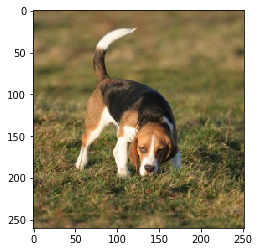

File: test_photos/02_dachshund_-_smooth.jpg
Looks like a dog
Could be a Dachshund


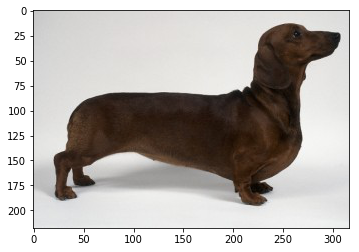

File: test_photos/03_german_shepherd_dog.jpg
Looks like a dog
Could be a German_shepherd_dog


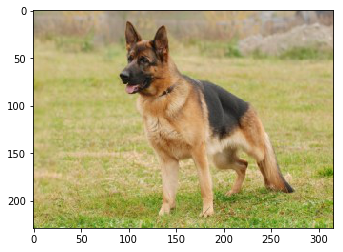

File: test_photos/04_irish_setter.jpg
Looks like a dog
Could be a Irish_setter


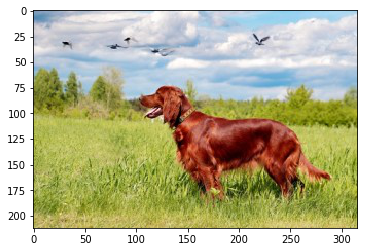

File: test_photos/05_mastiff.jpg
Looks like a dog
Could be a Mastiff


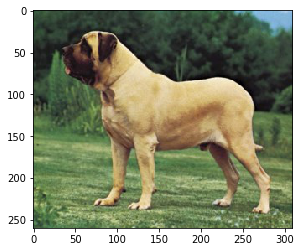

File: test_photos/06_weimaraner.jpg
Looks like a dog
Could be a German_shorthaired_pointer


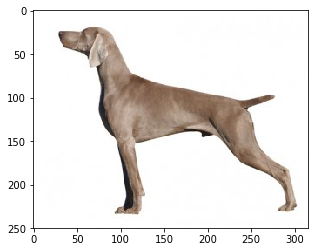

File: test_photos/07_whippet.jpg
Looks like a dog
Could be a Greyhound


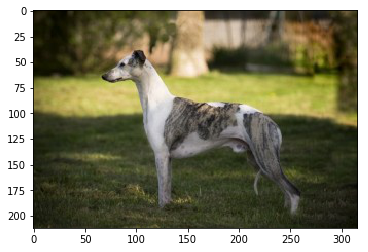

File: test_photos/08_corgi-on-back-on-couch.jpg
Looks like a dog
Could be a Lhasa_apso


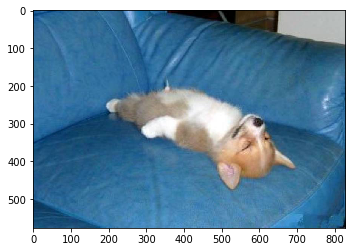

File: test_photos/09_cayote.jpg
Looks like a unknown
Could be a unknown


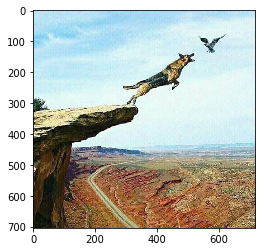

File: test_photos/10_sports_illustrated.jpg
Looks like a human
Could be a Chinese_crested


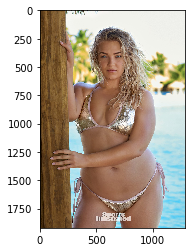

File: test_photos/11_sports_illustrated.jpg
Looks like a human
Could be a Chinese_crested


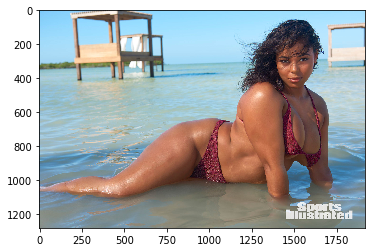

File: test_photos/12_sports_illustrated.jpg
Looks like a human
Could be a German_wirehaired_pointer


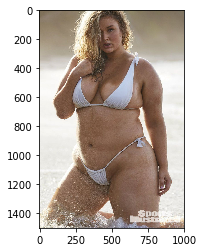

File: test_photos/UFO.jpg
Looks like a unknown
Could be a unknown


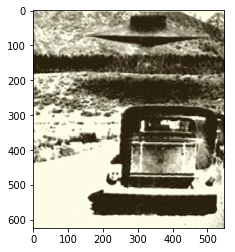

In [41]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_photo(path):
    print("File: {}".format(path))
    species, breed = what_is_it(path)
    print("Looks like a {}".format(species))
    print("Could be a {}".format(breed))
    img=mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()
    
test_photos = sorted(glob.iglob('test_photos/*'))

for path in test_photos:
    display_photo(path)

## Conclusion

### Reflection
The results using the InceptionV3 model are surprisingly good.  A dog show judge working from photos alone could probably do better, but the network probably does better than the average layman.  Also, easily forgotten because it's way back at the beginning, the ResNet50 got a perfect score at dog detection.

The big lesson for me in this project is that, "cheating" is OK, and cheaters actually _do_ prosper.  I created a network from scratch, toiling away for a substantial amount of time, with only modest success.  Then I tried augmenting the data and got an instant performance boost.  It felt like cheating.  Then I abandoned that effort, and used transfer learning from someone else's pre-trained network and got really good results.  That's more like stealing.  It's all so sick and wrong!

With an accuracy of over 75%, there's only so much room for improvement.  The next type of cheating I would like to engage in is the use of brightness/contrast normalization (which _could_ be considered data science) and bounding boxes (calling that "data science" would be a bit of a stretch).  But image processing and learning OpenCV seem like fodder for another course.

![](images/result_25.png)

This is a really fun project, and I intend to keep working on it.

### Improvement
There are several improvements I would like to make:
- Reduce the number of breeds.  In practical terms, quite a few of these breeds exist only in dog shows.
- Introduce an 'other' classification to contain the obscure breeds as well as mutts.
- Add the dimensions gender, height, weight, and age (and probably some others) to the training data, and also allow the user to supply them.  For the training data, it could contain contain whichever of these is available.  The occasional puppy aside, if you know the breed and the gender, with the help of a dog book you can impute the rest.  When predicting, the user would likewise be able to supply whichever of these data points is known.  This enhancement would require a change in network architecture.
- Preprocess the user input data, to coerce it into the assumptions listed in the Problem Statement:
  - If a dog is detected, but also 1 or more human faces are detected, exclude their bounding box from consideration.
  - If multiple dogs are detected, assume the subject is the dog with the largest bounding box.
  - Center/enlarge the subject, possibly with a small margin.
  - Note that this preprocessing does not apply to training data.  It might help, or it might hurt performance.  Some experimentation is called for.
- Add a lot more training data.  This is a big data problem, but the supplied training data is pretty small.